In [33]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import cv2

from tensorflow.keras.layers import Input, Conv2D 
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense 
from tensorflow.keras import Model
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

In [34]:
print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU')) 

True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [35]:
tf.__version__


'2.7.0'

In [36]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [37]:
path512 = "dataset_sidi_512.csv"
path = "dataset_sidi_v1.2.csv"
df512 = pd.read_csv(path, sep='\t')

#so com duas classes

from sklearn.utils import shuffle
df512 = shuffle(df512)
df512

,Unnamed: 0,image_name,NEG,NEU,POS,text,sent_text,sent_image,image_path,image_height,image_width
243787,243787,782863335171690496-3,0.012514,0.863711,0.123775,"📆 #OnThisDay in 2013, we maintained our 100% r...",NEU,1,data/78286/782863335171690496-3.jpg,1379,2048
142780,142780,780735875147792384-1,0.016348,0.055254,0.928397,We're beyond excited for this! 😍 https://t.co/...,POS,2,data/78073/780735875147792384-1.jpg,455,808
279883,279883,783529269041500160-1,0.013868,0.909301,0.076831,Sourdough with cheddar and parmesan cheese and...,NEU,1,data/78352/783529269041500160-1.jpg,315,600
270887,270887,783354123269836801-1,0.030895,0.096487,0.872618,Mmmm yummy! Oven dried apple rings anyone? Sur...,POS,2,data/78335/783354123269836801-1.jpg,1024,768
73806,73806,769381260892446720-2,0.004480,0.022149,0.973371,Never been so blessed in my life that both me ...,POS,2,data/76938/769381260892446720-2.jpg,1536,2048
...,...,...,...,...,...,...,...,...,...,...,...
78580,78580,769405537515671552-1,0.020540,0.924387,0.055073,RT @hshhoe: Can we talk about how @KarolsCorne...,NEU,1,data/76940/769405537515671552-1.jpg,1334,750
393357,393357,799049846380445696-1,0.693227,0.242323,0.064450,She hasn't replied for an hour https://t.co/yC...,NEG,0,data/79904/799049846380445696-1.jpg,400,463
14006,14006,769014804522622976-1,0.006426,0.062766,0.930808,RT @angarudo: [RT appreciated] #voltron #klanc...,POS,2,data/76901/769014804522622976-1.jpg,879,940
347423,347423,795942018090418177-1,0.399698,0.371843,0.228459,When @htgdublin's special sandwich becomes so ...,NEG,0,data/79594/795942018090418177-1.jpg,236,532


In [38]:

#TODA
filenames = ['./Dataset/b-t4sa_imgs/' + fname for fname in df512['image_path'].tolist()]

#Reduzido
#filenames = ['./Dataset512/' + fname+".jpg" for fname in df512['image_name'].tolist()]

labels = df512['sent_image'].tolist()
#labels = [1 if i==2 else i  for i in labels]

x_train, val_filenames, y_train, val_labels = train_test_split(filenames,labels, train_size=0.8,random_state=42)

x_val, x_test_filename, y_val, y_test = train_test_split(val_filenames,val_labels, train_size=0.5,random_state=42)

In [39]:
len(y_train), len( y_val), len( y_test)

(376468, 47059, 47059)

In [40]:
from keras.utils.np_utils import to_categorical   

y_train = to_categorical(y_train, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [67]:
#del model

In [68]:
tf.keras.backend.clear_session()
import gc
gc.collect()

156

## VGG


In [69]:
tf.keras.backend.clear_session()
import gc
gc.collect()

100

In [70]:
tf.keras.backend.clear_session()
import gc
gc.collect()

100

In [71]:
width = 128
height = 128
channels = 3


In [72]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input



#sem utilizar os pesos
base_model = VGG19(weights=None, include_top=False, input_shape=(width, height, channels))
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [73]:
flatten_layer = layers.Flatten()
dense1 = layers.Dense(1028, activation='relu')
dense2 = layers.Dense(1028, activation='relu')
prediction_layer = layers.Dense(3, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense1,
    dense2,
    prediction_layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1028)              8422404   
                                                                 
 dense_1 (Dense)             (None, 1028)              1057812   
                                                                 
 dense_2 (Dense)             (None, 3)                 3087      
                                                                 
Total params: 29,507,687
Trainable params: 29,507,687
Non-trainable params: 0
_________________________________________________________________


In [74]:

#opt =tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
opt = tf.keras.optimizers.Adam(learning_rate=0.000002)

model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

### FIT GENERATOR

In [75]:
#busca os dados que estão listados em train_filenames
import random
def generate_data(train_filenames,train_labels, batch_size,width, height,channels):
    dim = (width, height)
    while True:
        
        mistura = list(zip(train_filenames, train_labels))
        random.shuffle(mistura)
        train_filenames, train_labels = zip(*mistura)
        
        for i in range(0,len(train_filenames),batch_size):
            
            if  i+batch_size > len(train_filenames):
                bs = len(train_filenames)%batch_size
            else:
                bs = batch_size
            
            X_train = np.zeros((int(bs), width, height, channels))
            aux =0

            dim = (width, height)

            for j in train_filenames[i:i+ bs]:
                X_train[aux] =  np.asarray(cv2.resize(cv2.imread(j), dim, interpolation = cv2.INTER_AREA) )
                aux = aux + 1
                
            #img = X_train.reshape(( X_train.shape[0],) +(width, height,channels)).astype('float32') / 255.
            img = preprocess_input( X_train) 
            
            yield (img, np.array(train_labels[i:i+ bs]))

In [76]:
#dobra para 48 pra vê se tanka

batch_size=36

validation_steps = int(len(x_val)/batch_size)+(0 if len(x_val)%batch_size==0 else 1)
steps_per_epoch = int(len(x_train)/batch_size)+(0 if len(x_train)%batch_size==0 else 1)
steps_per_epoch,validation_steps,batch_size

(10458, 1308, 36)

In [77]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=1,  restore_best_weights=True)
epocas = 500

model.fit( generate_data(x_train, y_train, batch_size,width, height,channels),
          validation_steps=validation_steps,steps_per_epoch=steps_per_epoch,
          callbacks=[es], batch_size=batch_size,  epochs=epocas,
          validation_data=generate_data(x_val,y_val, batch_size,width, height,channels))

Epoch 1/500
10458/10458 [==============================] - 11035s 1s/step - loss: 1.0801 - accuracy: 0.4004 - val_loss: 1.0704 - val_accuracy: 0.4188
Epoch 2/500
10458/10458 [==============================] - 8829s 844ms/step - loss: 1.0633 - accuracy: 0.4287 - val_loss: 1.0614 - val_accuracy: 0.4269
Epoch 3/500
10458/10458 [==============================] - 9253s 885ms/step - loss: 1.0553 - accuracy: 0.4392 - val_loss: 1.0572 - val_accuracy: 0.4383
Epoch 4/500
10458/10458 [==============================] - 8934s 854ms/step - loss: 1.0491 - accuracy: 0.4474 - val_loss: 1.0610 - val_accuracy: 0.4326


### Resultados

In [78]:
#melhor resultado treinamento com duas densa de 1028 com  mg = preprocess_input(X_train)  bs 24

In [79]:
##generator para teste pra tankar com rede maior
def generate_data_teste(train_filenames, batch_size,width, height,channels):
    dim = (width, height)
    while True:
        
        
        for i in range(0,len(train_filenames),batch_size):
            
            if  i+batch_size > len(train_filenames):
                bs = len(train_filenames)%batch_size
            else:
                bs = batch_size
            
            X_train = np.zeros((int(bs), width, height, channels))
            aux =0

            dim = (width, height)

            for j in train_filenames[i:i+ bs]:
                X_train[aux] =  np.asarray(cv2.resize(cv2.imread(j), dim, interpolation = cv2.INTER_AREA) )
                aux = aux + 1
                
           # img = X_train.reshape(( X_train.shape[0],) +(width, height,channels)).astype('float32') / 255.
            img = preprocess_input(X_train) 
            
            yield (img)

In [80]:
y_pred = model.predict(generate_data_teste(x_test_filename,batch_size,width, height,channels),steps=validation_steps)

y_pred = np.argmax(y_pred, axis=-1)
test_labels_result= np.argmax(y_test, axis=-1)

print(accuracy_score(test_labels_result, y_pred));
print(classification_report(test_labels_result, y_pred));

0.4415945940202724
              precision    recall  f1-score   support

           0       0.48      0.41      0.44     15907
           1       0.43      0.48      0.45     15605
           2       0.43      0.44      0.43     15547

    accuracy                           0.44     47059
   macro avg       0.44      0.44      0.44     47059
weighted avg       0.44      0.44      0.44     47059



Negativo - 0     Neutro - 1      Positivo - 2


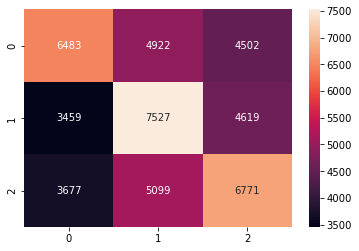

In [81]:
print("Negativo - 0     Neutro - 1      Positivo - 2")
sns.heatmap(confusion_matrix(test_labels_result, y_pred), annot=True, fmt="d");

In [87]:
m = confusion_matrix(test_labels_result, y_pred)
print("Acuracia de cada classe")
print("Negativo - 0     Neutro - 1      Positivo - 2")
m.diagonal()/m.sum(axis=1)

Acuracia de cada classe
Negativo - 0     Neutro - 1      Positivo - 2


array([0.40755642, 0.4823454 , 0.43551811])